In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/grikomsn/amazon-cell-phones-reviews?select=20191226-reviews.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [ ]:
filename1 = 'drive/MyDrive/TextAnalytics/20191226-items.csv'
filename2 = 'drive/MyDrive/TextAnalytics/20191226-reviews.csv'

In [ ]:
df_items = pd.read_csv(filename1)
df_reviews = pd.read_csv(filename2)

## Items.csv Data Description

In [ ]:
df_items.head(6)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0
5,B001GQ3DJM,Nokia,Nokia 1680 Black Phone (T-Mobile),https://www.amazon.com/Nokia-1680-Black-Phone-...,https://m.media-amazon.com/images/I/41X4VeqkFO...,2.7,https://www.amazon.com/product-reviews/B001GQ3DJM,3,0.00,0.0


In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


#### Missing values items.csv

In [ ]:
df_items.isna().sum()

asin             0
brand            4
title            0
url              0
image            0
rating           0
reviewUrl        0
totalReviews     0
price            0
originalPrice    0
dtype: int64

In [ ]:
for col in ['brand', 'title']:
  print(df_items[col].unique())

[nan 'Motorola' 'Nokia' 'Samsung' 'HUAWEI' 'Sony' 'Apple' 'Google' 'ASUS'
 'OnePlus' 'Xiaomi']
['Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen'
 'Motorola I265 phone'
 'MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE CELL PHONE'
 'Motorola i335 Cell Phone Boost Mobile'
 'Motorola V365 no contract cellular phone AT&T'
 'Nokia 1680 Black Phone (T-Mobile)'
 'Samsung Alias2 U750 Phone, Black (Verizon Wireless)'
 'Samsung a167 Prepaid GoPhone (AT&T)'
 'Verizon Wireless Motorola RAZR V3m - Silver'
 'Motorola Barrage V860 Phone (Verizon Wireless)'
 'Verizon or PagePlus Samsung Smooth U350 Great Condition Blue CDMA Cell Phone'
 'Samsung Smooth Verizon Wireless Prepaid Mobile Cell Camera Phone CDMA'
 'Samsung Rugby II, Black (AT&T)'
 'Motorola i570 Nextel iDen PTT rugged black cell phone'
 'Samsung Gusto, Black (Verizon Wireless)'
 'Samsung T201G Prepaid Phone (Net10)'
 'Samsung Convoy SCH-U640 Cell Phone Ruggedized PTT 2+ megapixel Camera for Veriz

Non ci sono valori sospetti (null, NaN, NULL) tra 'brand' e 'title'

In [ ]:
for col in df_items.columns:
  print(df_items[col].value_counts(dropna=False), end = "\n---------------------------------------------------------------------------------------------\n")

B07SMBJX7X    1
B00NKR9MJA    1
B01F5FYXNO    1
B07YVH6QRT    1
B07KCQHWTN    1
             ..
B07DZMB1ZK    1
B076QKMQ81    1
B071VGLCRX    1
B07BBZJ4G9    1
B07CZR8YV4    1
Name: asin, Length: 720, dtype: int64
---------------------------------------------------------------------------------------------
Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
NaN           4
Name: brand, dtype: int64
---------------------------------------------------------------------------------------------
Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G LTE Octa-Core Phone w/ 12.2MP Camera - Just Black                                                                   2
Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)                                                                                                 2
Samsung Galaxy S9+ G965U 64GB Lilac Purple - Sprint(Renewed)          

In [ ]:
df_items['image'].value_counts()

https://m.media-amazon.com/images/I/817r8IrEN5L._AC_UY218_ML3_.jpg    3
https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg    3
https://m.media-amazon.com/images/I/61zSaCsk-LL._AC_UY218_ML3_.jpg    2
https://m.media-amazon.com/images/I/71EpwFTgLOL._AC_UY218_ML3_.jpg    2
https://m.media-amazon.com/images/I/61nD-TYqHmL._AC_UY218_ML3_.jpg    2
                                                                     ..
https://m.media-amazon.com/images/I/61NDR6WOqPL._AC_UY218_ML3_.jpg    1
https://m.media-amazon.com/images/I/71m4jx-b3xL._AC_UY218_ML3_.jpg    1
https://m.media-amazon.com/images/I/61FXDt-ZxYL._AC_UY218_ML3_.jpg    1
https://m.media-amazon.com/images/I/71+figFvKvL._AC_UY218_ML3_.jpg    1
https://m.media-amazon.com/images/I/81NuMh5e+UL._AC_UY218_ML3_.jpg    1
Name: image, Length: 679, dtype: int64

#### Distribuzioni items.csv

Distribuzioni variabili numeriche

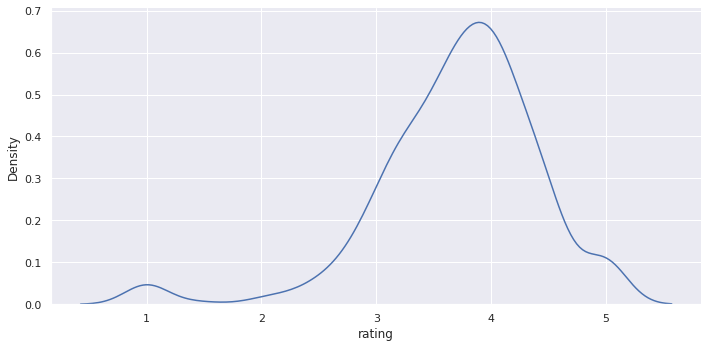

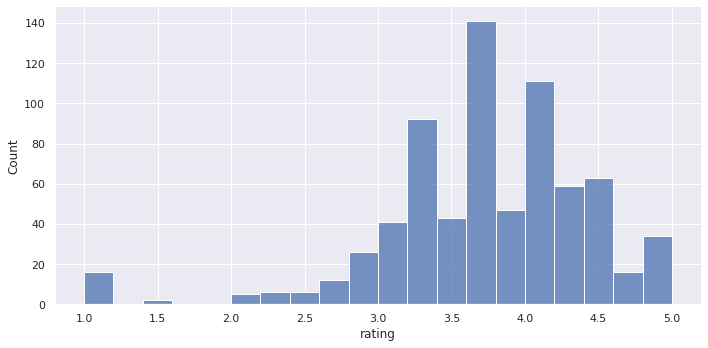

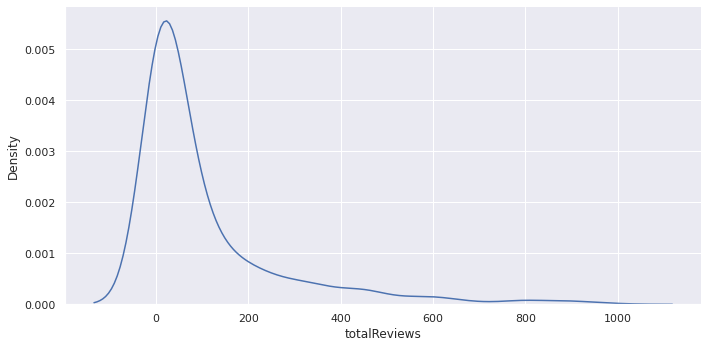

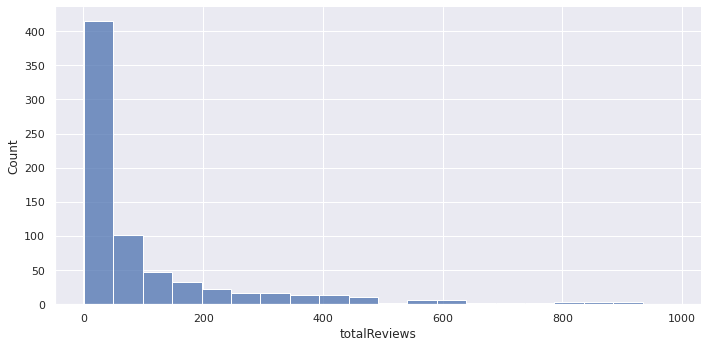

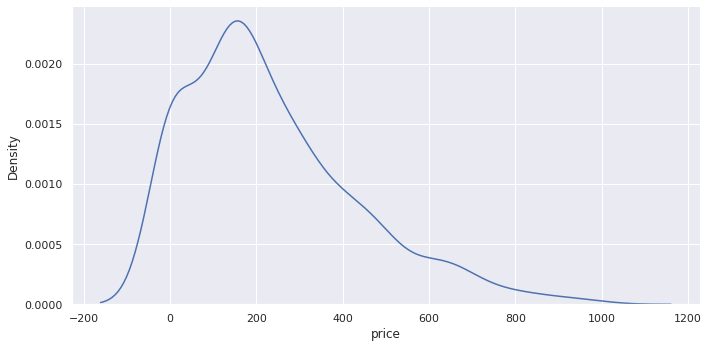

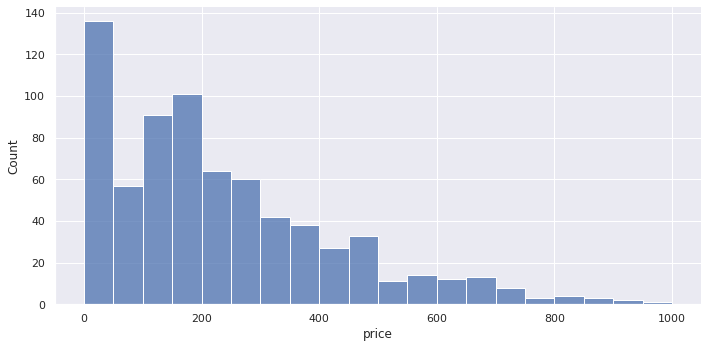

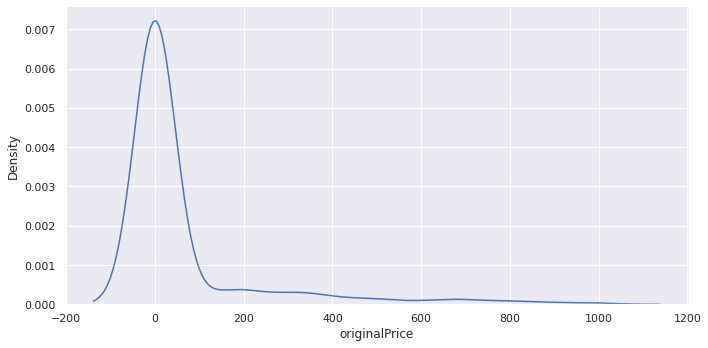

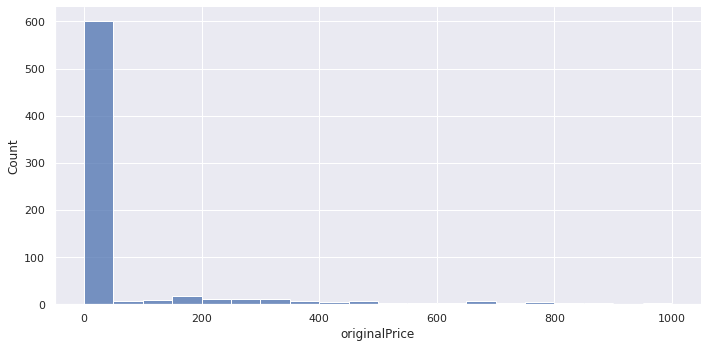

In [ ]:
for col in ['rating', 'totalReviews', 'price', 'originalPrice']:
  sns.set(style=('darkgrid'))
  sns.displot(df_items, x=col, kind = 'kde', aspect=2)
  sns.displot(df_items, x=col, kind = 'hist', aspect = 2, bins=20)

Ci sono dei valori anomali nei prezzi:
- 124 righe con 'price = 0'
- 600 righe con 'originalPrice = 0'

In [ ]:
df_items[df_items['price'] <= 0]['price'].count()

124

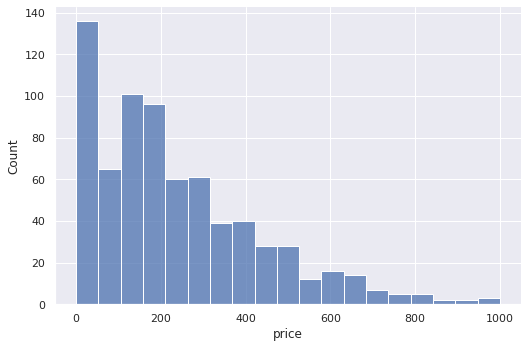

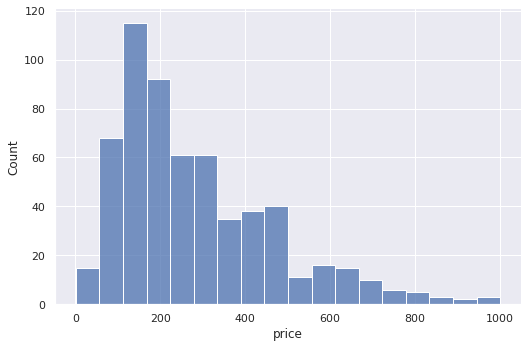

In [ ]:
# distribuzione di 'price' nel dataset intero
sns.displot(data=df_items['price'], kind = 'hist', aspect=1.5)
plt.show()

#distribuzione di 'price' senza valori nulli
sns.displot(data = df_items[df_items['price'] > 0]['price'], kind = 'hist', aspect=1.5)
plt.show()

In [ ]:
df_items[df_items['originalPrice']<=0]['originalPrice'].count()

600

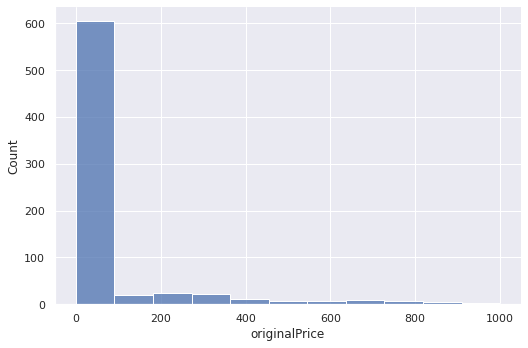

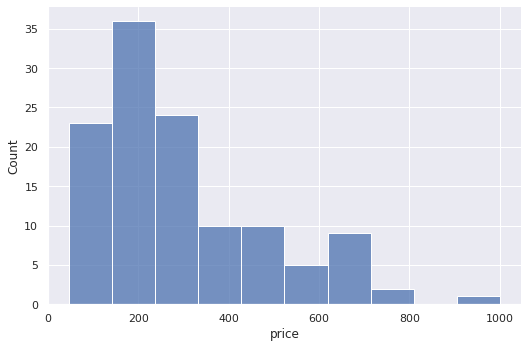

In [ ]:
# distribuzione di 'originalPrice' nel dataset intero
sns.displot(data=df_items['originalPrice'], kind = 'hist', aspect=1.5)
plt.show()

#distribuzione di 'originalPrice' senza valori nulli
sns.displot(data = df_items[df_items['originalPrice'] > 0]['price'], kind = 'hist', aspect=1.5)
plt.show()

Distribuzioni variabili categoriche

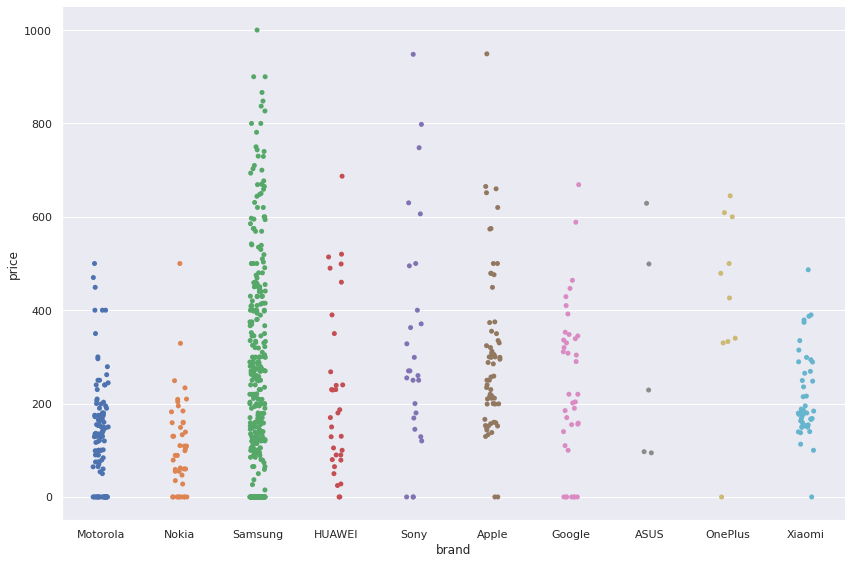

In [ ]:
for e in ['brand']: #, 'title']: # per title ci mette in sacco, e il grafico non è utile. salvo l'immagine nel mio pc
    sns.catplot(data=df_items, x=e, y='price', height=8, aspect=1.5)


## Unione *df_items* e *df_reviews*: creazione dataframe

In [ ]:
df_reviews.head(2)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0


In [ ]:
df_reviews.shape

(67986, 8)

In [ ]:
# Faccio merge sulla colonna asin
df = df_reviews.merge(df_items, on='asin')

# Rinomino le colonne con nomi simili
df = df.rename(columns={'rating_x':'review_rating', 'title_x':'review_title', 
                        'title_y':'product_title', 'rating_y':'product_rating'})

df.head(2)

,asin,name,review_rating,date,verified,review_title,body,helpfulVotes,brand,product_title,url,image,product_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67986 entries, 0 to 67985
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            67986 non-null  object 
 1   name            67984 non-null  object 
 2   review_rating   67986 non-null  int64  
 3   date            67986 non-null  object 
 4   verified        67986 non-null  bool   
 5   review_title    67972 non-null  object 
 6   body            67965 non-null  object 
 7   helpfulVotes    27215 non-null  float64
 8   brand           67786 non-null  object 
 9   product_title   67986 non-null  object 
 10  url             67986 non-null  object 
 11  image           67986 non-null  object 
 12  product_rating  67986 non-null  float64
 13  reviewUrl       67986 non-null  object 
 14  totalReviews    67986 non-null  int64  
 15  price           67986 non-null  float64
 16  originalPrice   67986 non-null  float64
dtypes: bool(1), float64(4), int64(2

In [ ]:
# 'date' non è nel formato data, perciò lo splitto per ottenere l'anno
df[['day_month','year']] = df['date'].str.split(',', 1, expand=True)

# Droppo la colonna 'day_month'
df = df.drop(columns=['day_month'])

# Riordino le colonne per avere 'year' dopo 'date'
year = df['year']
df = df.drop(columns=['year'])
df.insert(loc=4, column='year', value=year)


df.head(2)

,asin,name,review_rating,date,year,verified,review_title,body,helpfulVotes,brand,product_title,url,image,product_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",2005,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",2004,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


## Distribuzioni di *date*, *review_rating*, *helpfulVotes*, *product_rating*, *price*

In [ ]:
df['year'].value_counts()

 2019    27990
 2018    12487
 2017     7277
 2016     4862
 2015     3928
 2014     2706
 2013     1613
 2012      294
 2011       50
 2010       12
 2009        6
Name: year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


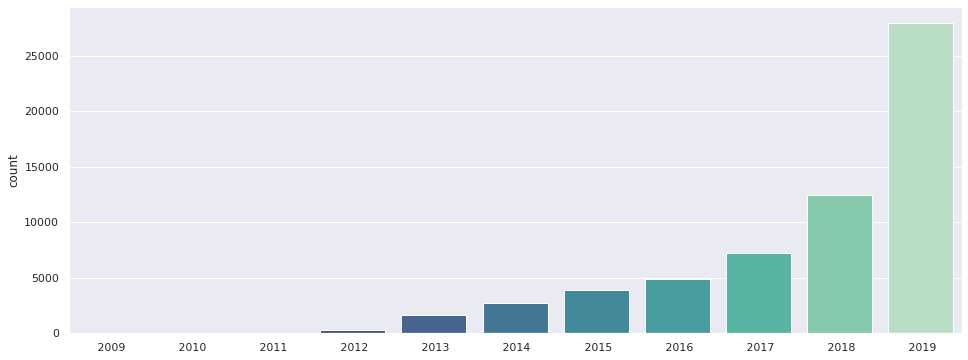

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style=('darkgrid'))
#g = sns.histplot(df['year'])
g = sns.countplot(sorted(df['year']), palette = 'mako')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


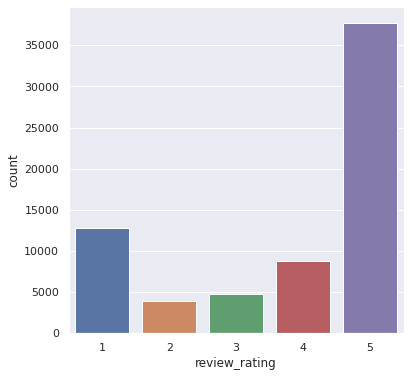

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style=('darkgrid'))
g = sns.countplot(df['review_rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

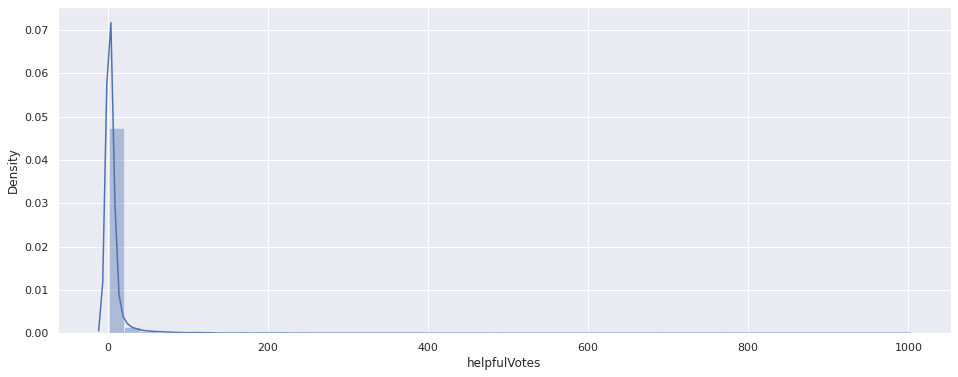

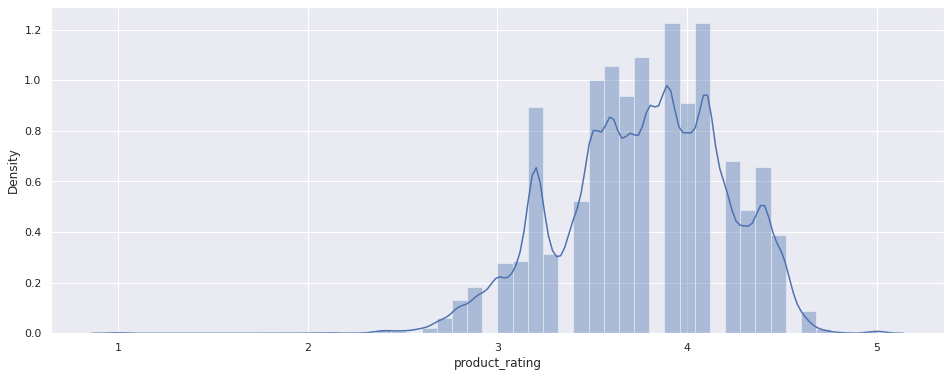

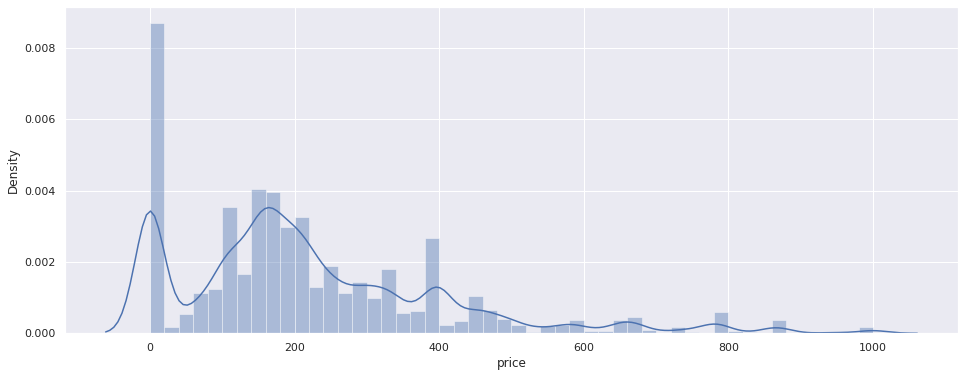

In [ ]:
# for col in ['helpfulVotes','product_rating','price']:


plt.figure(figsize=(16, 6))
sns.set(style=('darkgrid'))
g = sns.distplot(df['helpfulVotes'])

plt.figure(figsize=(16, 6))
sns.set(style=('darkgrid'))
g = sns.distplot(df['product_rating'])

plt.figure(figsize=(16, 6))
sns.set(style=('darkgrid'))
g = sns.distplot(df['price'])

## Analisi missing values

In [ ]:
df.isna().sum()

asin                  0
name                  2
review_rating         0
date                  0
year                  0
verified              0
review_title         14
body                 21
helpfulVotes      40771
brand               200
product_title         0
url                   0
image                 0
product_rating        0
reviewUrl             0
totalReviews          0
price                 0
originalPrice         0
dtype: int64

In [ ]:
len(df)

67986

In [ ]:
len(df[df['price'] <=0]) # proviamo ad eliminare le righe?

11755

In [ ]:
len(df[df['originalPrice'] <=0]) # eliminiamo la colonna

53704

## Analisi lingua (dati prelevati da Amazon.com)

In [ ]:
!pip install spacy_langdetect

     |████████████████████████████████| 998 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993431 sha256=56448bb5ca344bb13fdd3989fe3f8055b8a490c9b183ac5885d7c8eb9e268cf7
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect


In [ ]:
from spacy_langdetect import LanguageDetector
import spacy
nlp = spacy.load('en')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

languages = []
for review in df['body']:
    try:
        doc = nlp(review)
        detection = doc._.language
    except TypeError:
        if review == 'nan':
            detection = review
    finally:
        languages.append(detection)


In [ ]:
# languages è una lista di dizionari, con chiavi 'language' e 'score'
languages[:3]

[{'language': 'en', 'score': 0.9999966392063782},
 {'language': 'en', 'score': 0.9999979567309454},
 {'language': 'en', 'score': 0.999994243723362}]

In [ ]:
lingue = []  # voglio solo la lingua, esempio 'en'

# languages è una lista di dizionari
for e in languages:
    # prendo i values del dizionario (quindi ['en', 0.9])
    # se non trasformo in lista ottengo un ogetto dict-values
    r = list(e.values())  
    lingue.append(r[0]) #prendo solo la lingua

print(lingue)
print('Lunghezza lista con lingue:',len(lingue))
print('Lunghezza df:', len(df))

['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'de', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'so', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'ca', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'et', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'fr', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'af

In [ ]:
df['language'] = lingue

In [ ]:
df.head(1)

,asin,name,review_rating,date,year,verified,review_title,body,helpfulVotes,brand,product_title,url,image,product_rating,reviewUrl,totalReviews,price,originalPrice,language
0,B0000SX2UC,Janet,3,"October 11, 2005",2005,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,en


In [ ]:
# Numero di recensioni per ogni lingua
df['language'].value_counts()

# Salvo in un dataframe
num_languages = pd.DataFrame(df['language'].value_counts())
num_languages.head(3)

,language
en,59854
es,3117
af,798


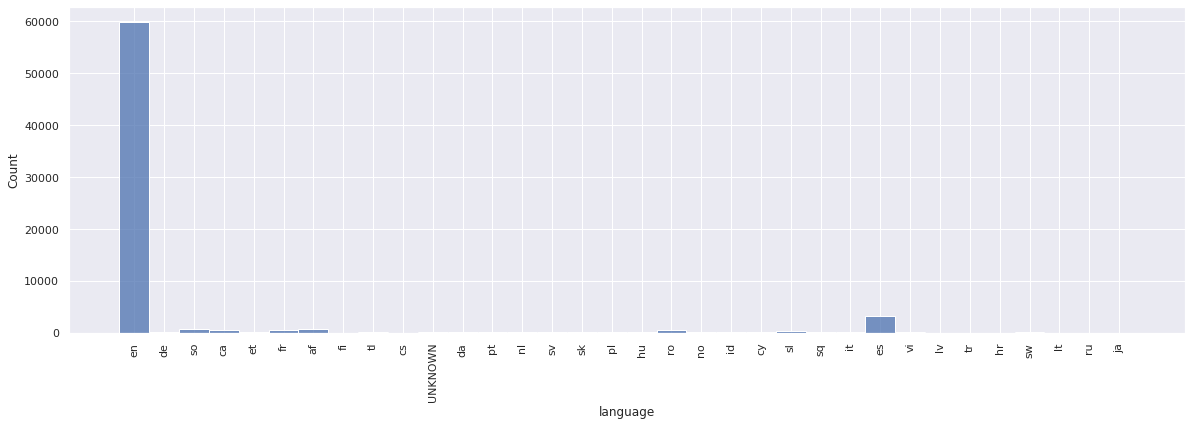

In [ ]:
# Plotto il numero di recensioni per lingua

plt.figure(figsize=(20, 6))
sns.set(style=('darkgrid'))
plt.xticks(rotation=90) # etichette asse x in verticale
g = sns.histplot(df['language'])

In [ ]:
df['english'] = [1 if e == 'en' else 0 for e in df['language']]

In [ ]:
df.head(1)

,asin,name,review_rating,date,year,verified,review_title,body,helpfulVotes,brand,product_title,url,image,product_rating,reviewUrl,totalReviews,price,originalPrice,language,english
0,B0000SX2UC,Janet,3,"October 11, 2005",2005,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,en,1


## Eliminiamo i record *verified == False*


In [ ]:
no_verified = df[df['verified'] == False].index
print(len(df))
df.drop(no_verified, inplace=True)
print(len(df))

67986
61225


## Correlazione tra variabili

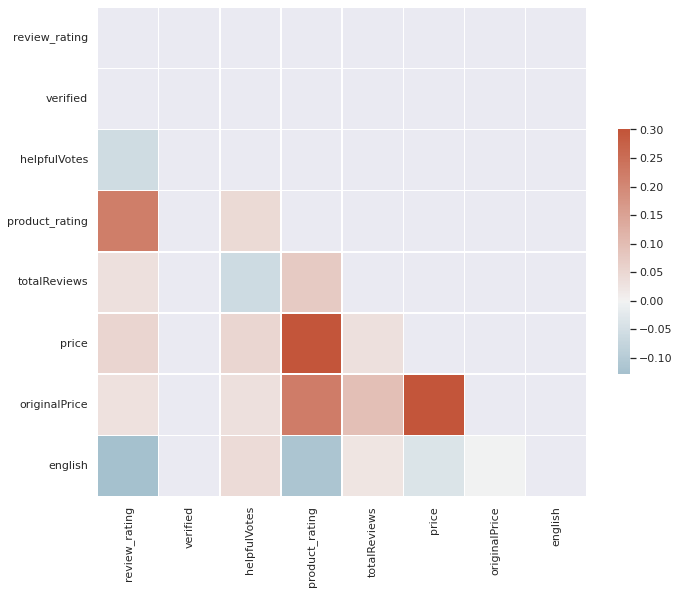

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

oppure:

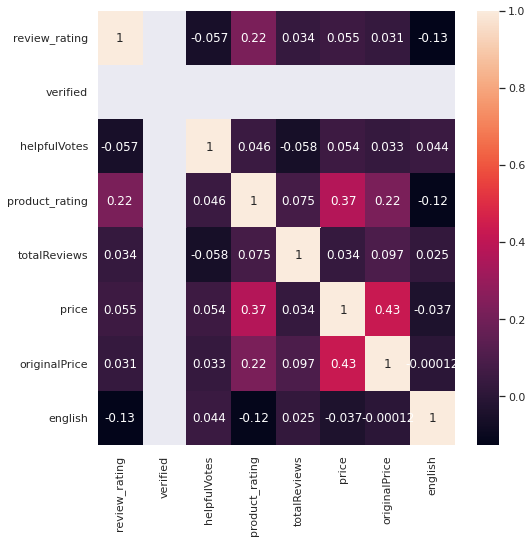

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True)

In [ ]:
# Salvo il dataframe
df.to_csv('drive/MyDrive/TextAnalytics/post_data_understanding.csv')